In [1]:
import sys
sys.path.insert(0, '..')

%reload_ext tools.prov_magics
import tools.view.versioned_prov

x


# Versioned-PROV

## Names, literals, and constants

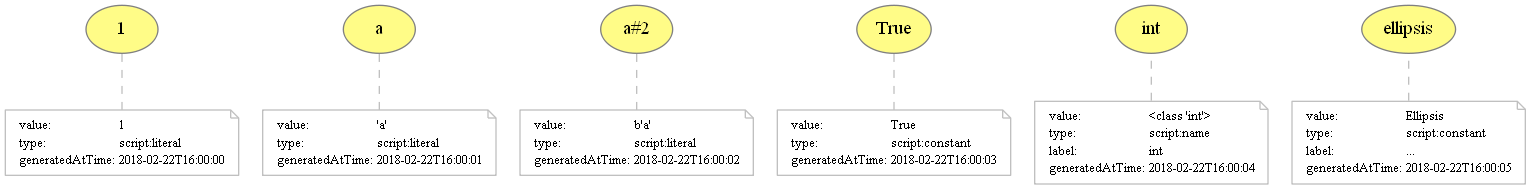

In [2]:
%%provn -o ../images/versioned_prov/names -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
    
entity(1, [value="1", type="script:literal", generatedAtTime="2018-02-22T16:00:00"])
entity(a, [value="'a'", type="script:literal", generatedAtTime="2018-02-22T16:00:01"])
entity(a#2, [value="b'a'", type="script:literal", generatedAtTime="2018-02-22T16:00:02"])
entity(True, [value="True", type="script:constant", generatedAtTime="2018-02-22T16:00:03"])
entity(int, [value="<class 'int'>", type="script:name", label="int", generatedAtTime="2018-02-22T16:00:04"])
entity(ellipsis, [value="Ellipsis", type="script:constant", label="...", generatedAtTime="2018-02-22T16:00:05"])

## Assignment

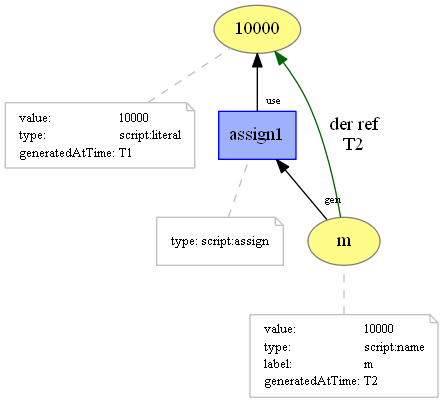

In [3]:
%%provn -o ../images/versioned_prov/assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>
    
entity(10000, [value="10000", type="script:literal", generatedAtTime="T1"])
entity(m, [value="10000", type="script:name", label="m", generatedAtTime="T2"])

activity(assign1, [type="script:assign"])
used(u1; assign1, 10000, -)
wasGeneratedBy(g1; m, assign1, -)
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="versioned:Reference", versioned:moment="T2"])

## Operation

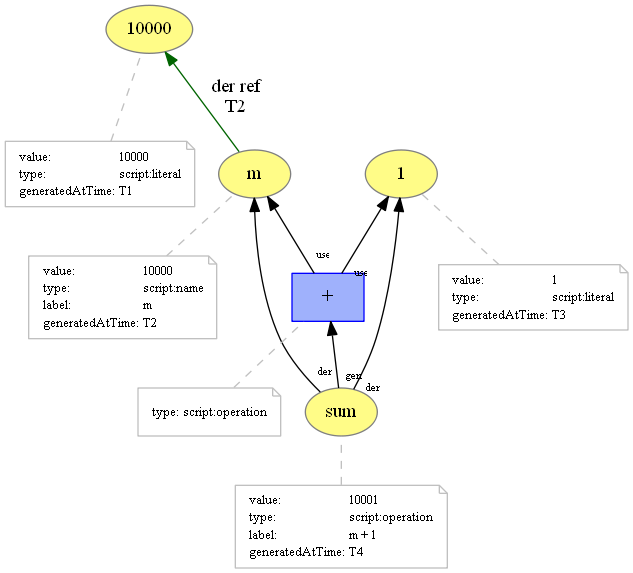

In [4]:
%%provn -o ../images/versioned_prov/operation -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(10000, [value="10000", type="script:literal", generatedAtTime="T1"])
entity(m, [value="10000", type="script:name", label="m", generatedAtTime="T2"])
wasDerivedFrom(m, 10000, -, -, -, [type="versioned:Reference", versioned:moment="T2"])

// new
entity(1, [value="1", type="script:literal",  generatedAtTime="T3"])
entity(sum, [value="10001", type="script:operation", label="m + 1", generatedAtTime="T4"])

activity(+, [type="script:operation"])
used(u2; +, m, -)
used(u3; +, 1, -)
wasGeneratedBy(g2; sum, +, -)
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g3, u3)

## List definition

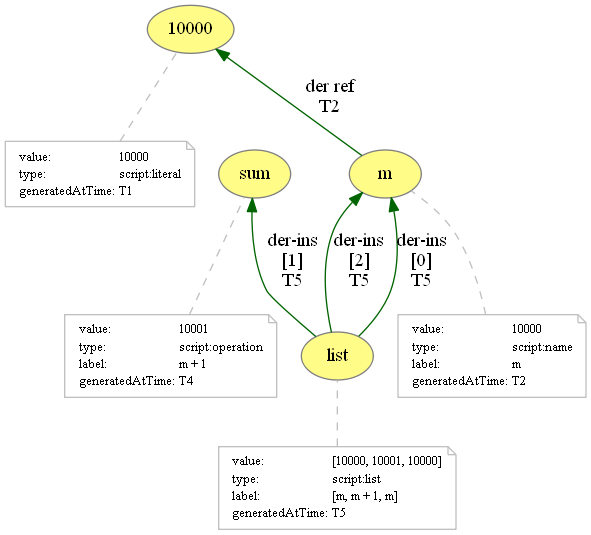

In [5]:
%%provn -o ../images/versioned_prov/list -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(10000, [value="10000", type="script:literal", generatedAtTime="T1"])
entity(m, [value="10000", type="script:name", label="m", generatedAtTime="T2"])
wasDerivedFrom(m, 10000, -, -, -, [type="versioned:Reference", versioned:moment="T2"])
entity(sum, [value="10001", type="script:operation", label="m + 1", generatedAtTime="T4"])

// new
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", generatedAtTime="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="0", versioned:moment="T5"])
hadMember(list, sum, [type="versioned:Insertion", versioned:key="1", versioned:moment="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="2", versioned:moment="T5"])

## Assignment of list definition

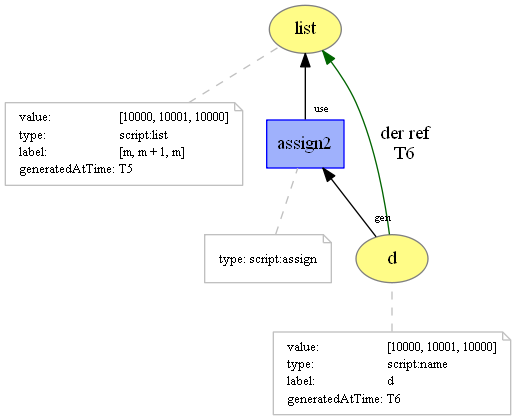

In [6]:
%%provn -o ../images/versioned_prov/list_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", generatedAtTime="T5"])

// new
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d", generatedAtTime="T6"])

activity(assign2, [type="script:assign"])
used(u7; assign2, list, -)
wasGeneratedBy(g7; d, assign2, -)
wasDerivedFrom(d, list, assign2, g7, u7, [type="versioned:Reference", versioned:moment="T6"])

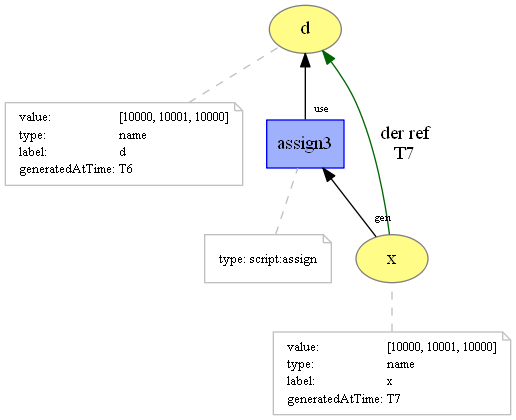

In [7]:
%%provn -o ../images/versioned_prov/list_assign2 -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(d, [value="[10000, 10001, 10000]", type="name", label="d", generatedAtTime="T6"])

// new
entity(x, [value="[10000, 10001, 10000]", type="name", label="x", generatedAtTime="T7"])

activity(assign3, [type="script:assign"])
used(u8; assign3, d, -)
wasGeneratedBy(g8; x, assign3, -)
wasDerivedFrom(x, d, assign3, g8, u8, [type="versioned:Reference", versioned:moment="T7"])

## Function call

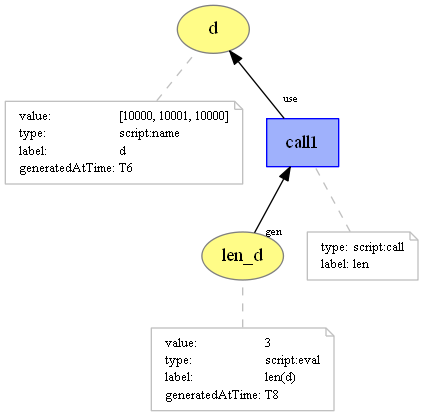

In [8]:
%%provn -o ../images/versioned_prov/call -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>
    
// old
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d", generatedAtTime="T6"])

// new
entity(len_d, [value="3", type="script:eval", label="len(d)", generatedAtTime="T8"])

activity(call1, [type="script:call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

## Access to part of structure

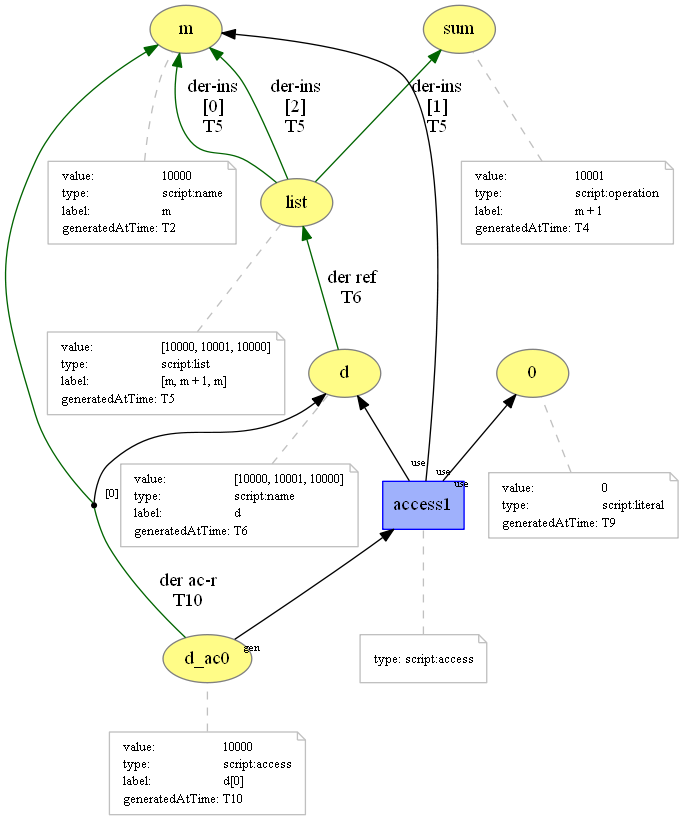

In [9]:
%%provn -o ../images/versioned_prov/access -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m", generatedAtTime="T2"])
entity(sum, [value="10001", type="script:operation", label="m + 1", generatedAtTime="T4"])

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", generatedAtTime="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="0", versioned:moment="T5"])
hadMember(list, sum, [type="versioned:Insertion", versioned:key="1", versioned:moment="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="2", versioned:moment="T5"])

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d", generatedAtTime="T6"])
wasDerivedFrom(d, list, -, -, -, [type="versioned:Reference", versioned:moment="T6"])


// new
entity(0, [value="0", type="script:literal", generatedAtTime="T9"])

entity(d_ac0, [value="10000", type="script:access", label="d[0]", generatedAtTime="T10"])


activity(access1, [type="script:access"])
used(access1, d, -)
used(access1, 0, -)
used(u9; access1, m, -)
wasGeneratedBy(g9; d_ac0, access1, -)
wasDerivedFrom(d_ac0, m, access1, g9, u9, [
    type="versioned:Reference", versioned:moment="T10", 
    versioned:whole="d", versioned:key="0", versioned:access="r"])

## Assignment to part of structure

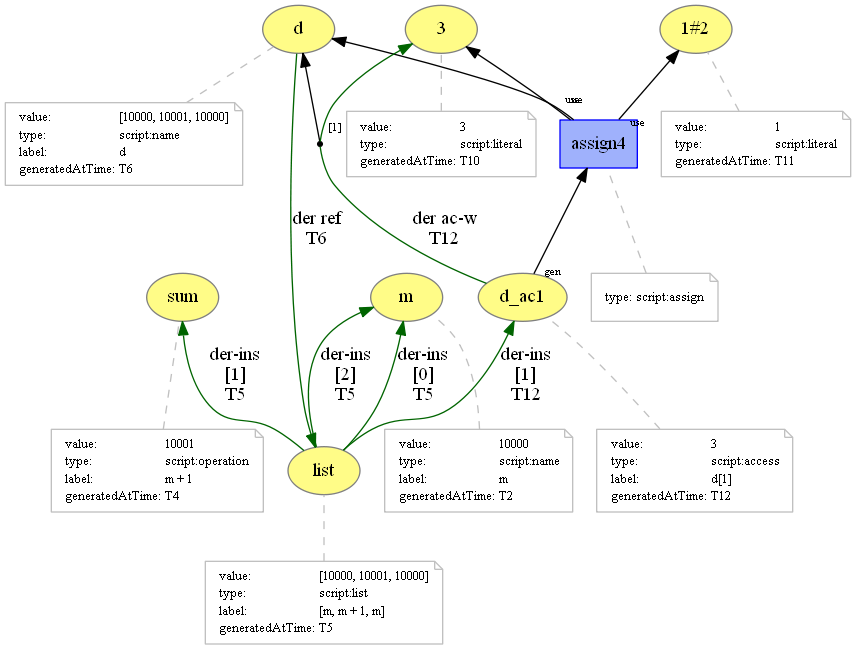

In [10]:
%%provn -o ../images/versioned_prov/part_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m", generatedAtTime="T2"])
entity(sum, [value="10001", type="script:operation", label="m + 1", generatedAtTime="T4"])

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", generatedAtTime="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="0", versioned:moment="T5"])
hadMember(list, sum, [type="versioned:Insertion", versioned:key="1", versioned:moment="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="2", versioned:moment="T5"])

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d", generatedAtTime="T6"])
wasDerivedFrom(d, list, -, -, -, [type="versioned:Reference", versioned:moment="T6"])


// new
entity(3, [value="3", type="script:literal", generatedAtTime="T10"])
entity(1#2, [value="1", type="script:literal", generatedAtTime="T11"])

entity(d_ac1, [value="3", type="script:access", label="d[1]", generatedAtTime="T12"])
hadMember(list, d_ac1, [type="versioned:Insertion", versioned:key="1", versioned:moment="T12"])

activity(assign4, [type="script:assign"])
used(assign4, d, -)
used(assign4, 1#2, -)
used(u10; assign4, 3)
wasGeneratedBy(g10; d_ac1, assign4, -)
wasDerivedFrom(d_ac1, 3, assign4, g10, u10, [
    type="versioned:Reference", versioned:moment="T12",
    versioned:whole="d", versioned:key="1", versioned:access="w"])

## Full

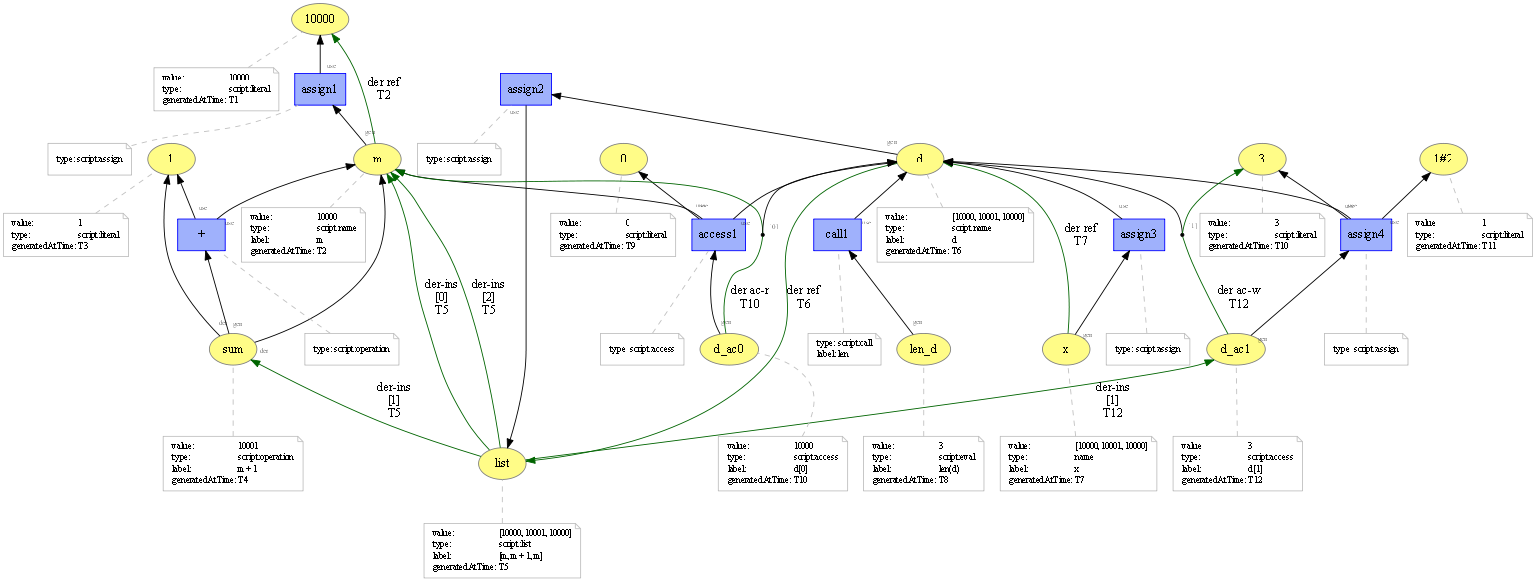

In [11]:
%%provn -o ../images/versioned_prov/full -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix versioned <https://dew-uff.github.io/versioned-prov/ns#>

// assignment
entity(10000, [value="10000", type="script:literal", generatedAtTime="T1"])
entity(m, [value="10000", type="script:name", label="m", generatedAtTime="T2"])

activity(assign1, [type="script:assign"])
used(u1; assign1, 10000, -)
wasGeneratedBy(g1; m, assign1, -)
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="versioned:Reference", versioned:moment="T2"])

// operation
entity(1, [value="1", type="script:literal",  generatedAtTime="T3"])
entity(sum, [value="10001", type="script:operation", label="m + 1", generatedAtTime="T4"])

activity(+, [type="script:operation"])
used(u2; +, m, -)
used(u3; +, 1, -)
wasGeneratedBy(g2; sum, +, -)
wasDerivedFrom(sum, m, +, g2, u2)
wasDerivedFrom(sum, 1, +, g3, u3)

// list def
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", generatedAtTime="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="0", versioned:moment="T5"])
hadMember(list, sum, [type="versioned:Insertion", versioned:key="1", versioned:moment="T5"])
hadMember(list, m, [type="versioned:Insertion", versioned:key="2", versioned:moment="T5"])

// list assign
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d", generatedAtTime="T6"])

activity(assign2, [type="script:assign"])
used(u7; assign2, list, -)
wasGeneratedBy(g7; d, assign2, -)
wasDerivedFrom(d, list, assign2, g7, u7, [type="versioned:Reference", versioned:moment="T6"])

// list assign x
entity(x, [value="[10000, 10001, 10000]", type="name", label="x", generatedAtTime="T7"])

activity(assign3, [type="script:assign"])
used(u8; assign3, d, -)
wasGeneratedBy(g8; x, assign3, -)
wasDerivedFrom(x, d, assign3, g8, u8, [type="versioned:Reference", versioned:moment="T7"])

// call
entity(len_d, [value="3", type="script:eval", label="len(d)", generatedAtTime="T8"])

activity(call1, [type="script:call", label="len"])
used(call1, d, -)
wasGeneratedBy(len_d, call1, -)

// part access
entity(0, [value="0", type="script:literal", generatedAtTime="T9"])

entity(d_ac0, [value="10000", type="script:access", label="d[0]", generatedAtTime="T10"])


activity(access1, [type="script:access"])
used(access1, d, -)
used(access1, 0, -)
used(u9; access1, m, -)
wasGeneratedBy(g9; d_ac0, access1, -)
wasDerivedFrom(d_ac0, m, access1, g9, u9, [
    type="versioned:Reference", versioned:moment="T10", 
    versioned:whole="d", versioned:key="0", versioned:access="r"])

// part assign
entity(3, [value="3", type="script:literal", generatedAtTime="T10"])
entity(1#2, [value="1", type="script:literal", generatedAtTime="T11"])

entity(d_ac1, [value="3", type="script:access", label="d[1]", generatedAtTime="T12"])
hadMember(list, d_ac1, [type="versioned:Insertion", versioned:key="1", versioned:moment="T12"])

activity(assign4, [type="script:assign"])
used(assign4, d, -)
used(assign4, 1#2, -)
used(u10; assign4, 3)
wasGeneratedBy(g10; d_ac1, assign4, -)
wasDerivedFrom(d_ac1, 3, assign4, g10, u10, [
    type="versioned:Reference", versioned:moment="T12",
    versioned:whole="d", versioned:key="1", versioned:access="w"])